In [1]:
# Librairies de base
import os
import random
import numpy as np

# Graphes
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.tree import export_graphviz
from IPython.display import Image

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#Eviter les Deprecated warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

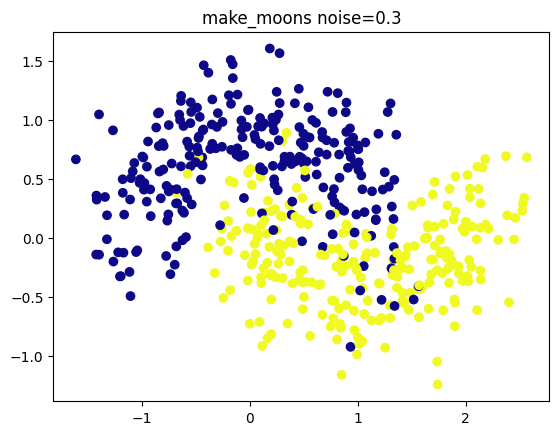

In [2]:
X, y = make_moons(n_samples=500, noise=0.3, random_state=7)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43)
plt.scatter(X[:,0],X[:,1], c = y,cmap='plasma');
plt.title('make_moons noise=0.3')
plt.show()


In [3]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), # Classifier de base (ici un arbre)
    n_estimators=500,         # Nombre d'estimateurs utilisés
    max_samples=100,          # Taille échantillon pour chaque apprentissage
    bootstrap=True,           # Tirage avec remise (Bagging)
    n_jobs=-1,                # Parralélisation (-1 pour utilisé tout les coeurs dispos)
    oob_score=True,           # Calcul Score sur chaque estimateur à partir des données non sélectionnées
    random_state=7            # Pour obtenir toujours le même tirage aléatoire
)
bag_clf.fit(X_train, y_train)
print("out of the bag score :", bag_clf.oob_score_)
y_pred = bag_clf.predict(X_test)
print("Final score :", accuracy_score(y_test, y_pred))


out of the bag score : 0.912
Final score : 0.912


Arbre N° 153


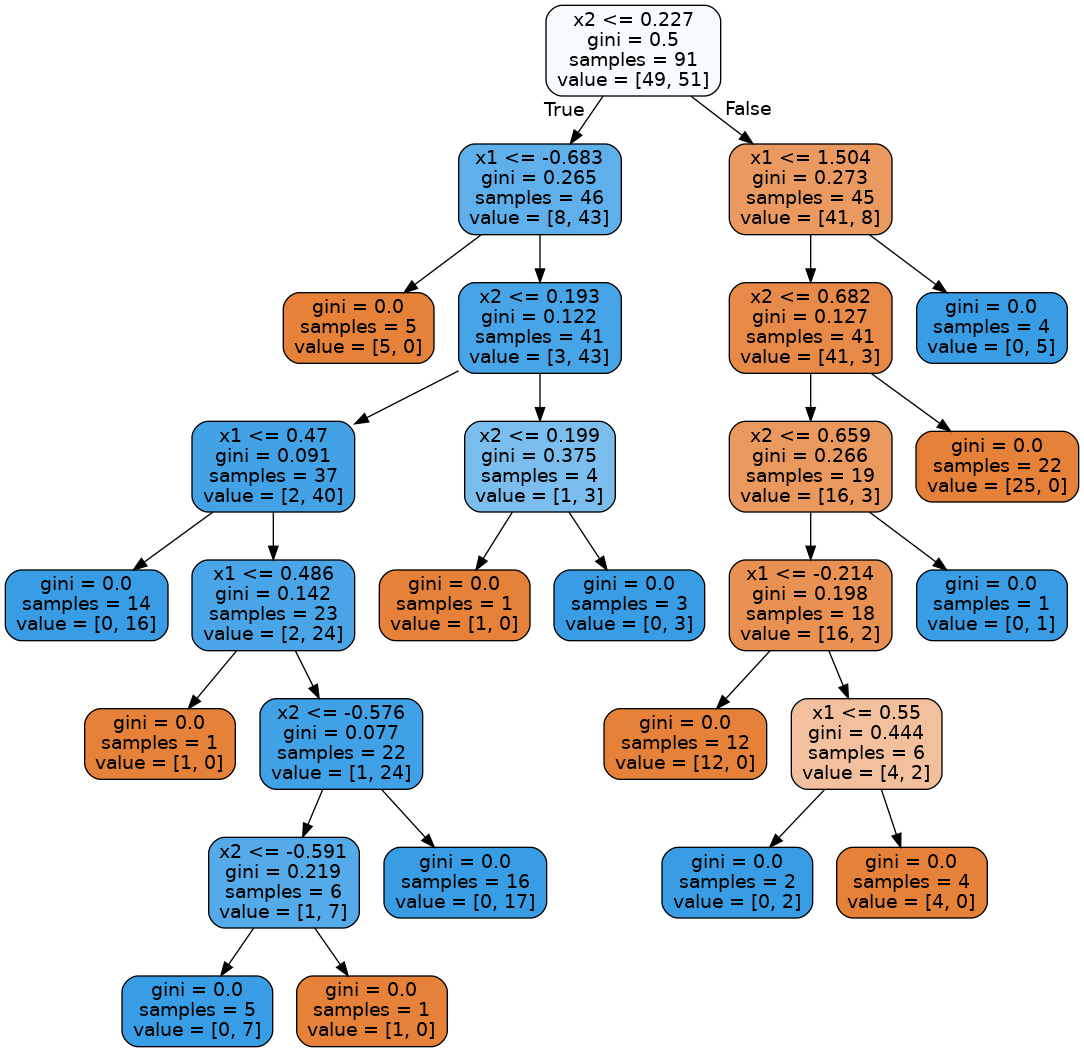

In [4]:
rd_tree=random.randint(0,499)
print('Arbre N°',rd_tree)

export_graphviz(bag_clf.estimators_[rd_tree],
                out_file="tree.dot",
                feature_names=['x1','x2'],
                filled=True,
                rounded=True)

#appel à la fonction dot de graphwiz
os.system("dot -Tpng tree.dot -o tree.png")
#Affichage de l'image créée
Image("tree.png")


In [5]:
tree_clf = DecisionTreeClassifier(random_state=7)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))


0.872


In [6]:
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "ys", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)


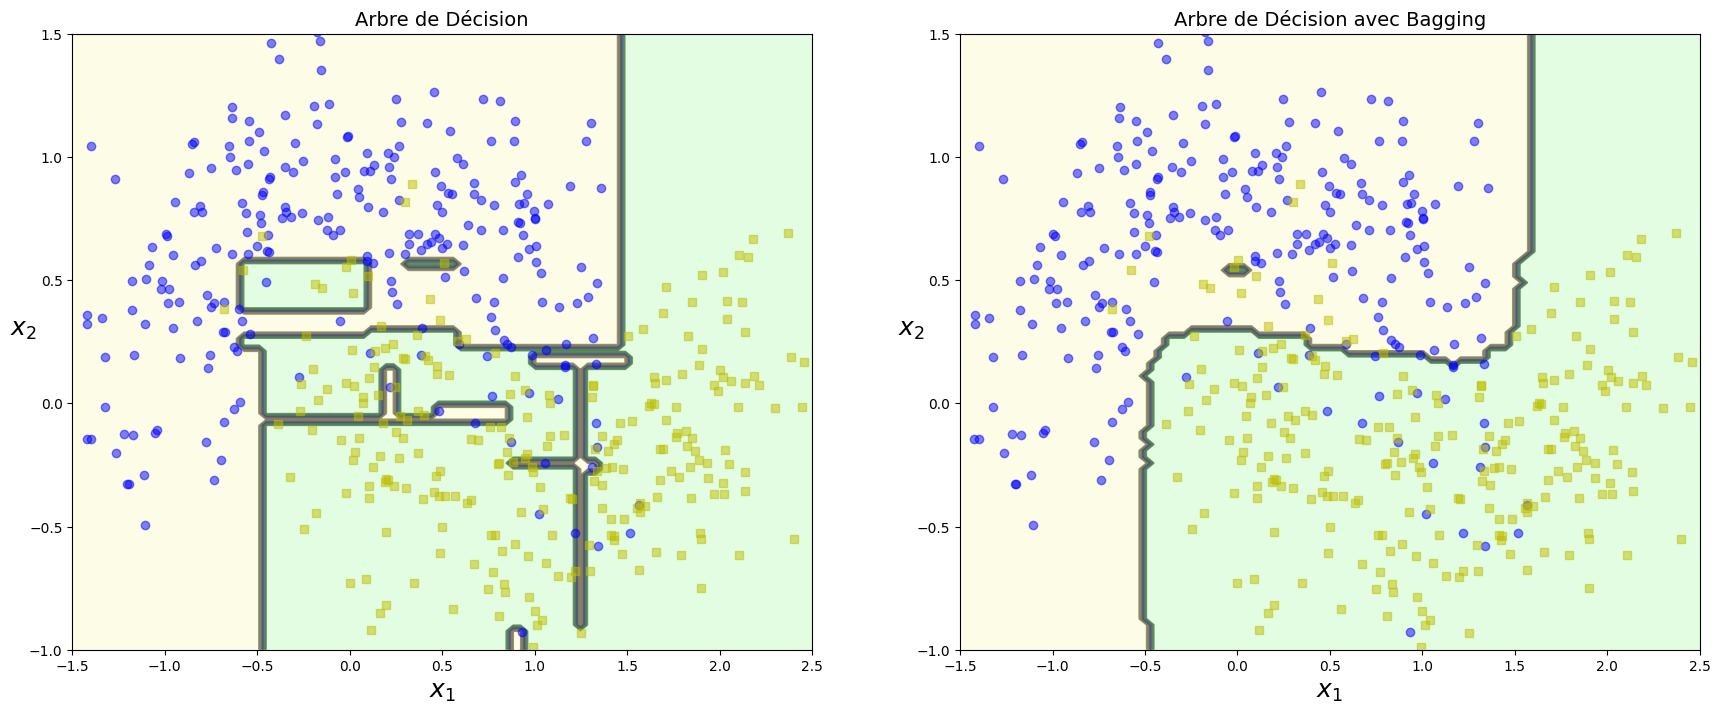

In [7]:
plt.figure(figsize=(21,8))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title("Arbre de Décision", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("Arbre de Décision avec Bagging", fontsize=14)
plt.show()
